In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#reading image
image = cv2.imread('/home/pratikshinde/sugarcane/data/images/1_830_2255_3024_1793.jpeg',cv2.IMREAD_COLOR) #'/workspace/sugarcane/data/images/1_830_2256_3023_1270.jpeg'

In [3]:
#reading mask
mask = cv2.imread('/home/pratikshinde/sugarcane/data/masks/1_830_2255_3024_1793.png',cv2.IMREAD_COLOR)   #'/workspace/sugarcane/data/masks/1_830_2256_3023_1270.png' /home/pratikshinde/Downloads/Automaton AI Practice/pomegranate/home/pratikshinde/Downloads/Automaton AI Practice/pomegranate/data/masks 

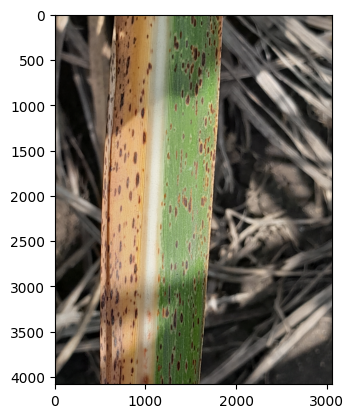

In [4]:
#plotting image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [5]:
image.shape

(4080, 3060, 3)

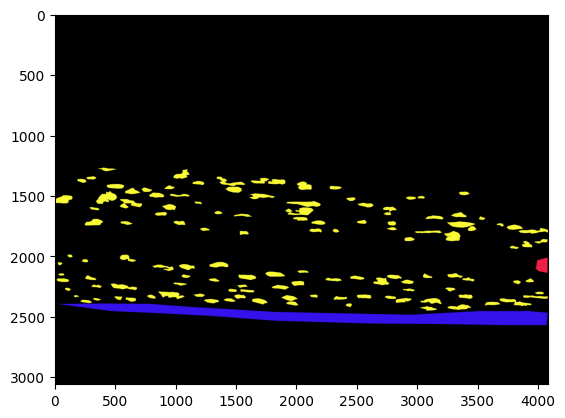

In [6]:
#Plotting mask
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.imshow(mask)

In [7]:
#Checking the shape 
mask.shape

(3060, 4080, 3)

In [9]:
#Obtained these labels from the CVAT export
# label:color_rgb:parts:actions
# background:0,0,0::
# bacterial_fruit_blight:51,221,255::
# fruit_spot:131,224,112::
# pest_attack:255,204,51::

In [8]:
COLORMAP = [[53,17,236], [238,32,69], [250,250,55],[252,39,180]] 
CLASSES = ['leaf_scald','red_strip','rust','white_mot']

In [9]:
#This function will create labels for us
def convert_to_segmentation_mask(mask):
    #
    # Pascal VOC uses an RGB image to encode the segmentation mask for that image. RGB values of a pixel
    # encode the pixel's class.
    #
    # AutoAlbument requires a segmentation mask to be a NumPy array with the shape [height, width, num_classes].
    # Each channel in this mask should encode values for a single class. Pixel in a mask channel should have
    # a value of 1.0 if the pixel of the image belongs to this class and 0.0 otherwise.
    height, width = mask.shape[:2]
    segmentation_mask = np.zeros((height, width, len(COLORMAP)), dtype=np.float32)
    for label_index, label in enumerate(COLORMAP):
        print(label)
        segmentation_mask[:, :, label_index] = np.all(mask == label, axis=-1).astype(float)
    return segmentation_mask

In [10]:
COLORMAP

[[53, 17, 236], [238, 32, 69], [250, 250, 55], [252, 39, 180]]

In [12]:
label= convert_to_segmentation_mask(mask)
# label = cv2.cvtColor(label, cv2.COLOR_BGR2RGB)
label.shape

[53, 17, 236]
[238, 32, 69]
[250, 250, 55]
[252, 39, 180]


(3060, 4080, 4)

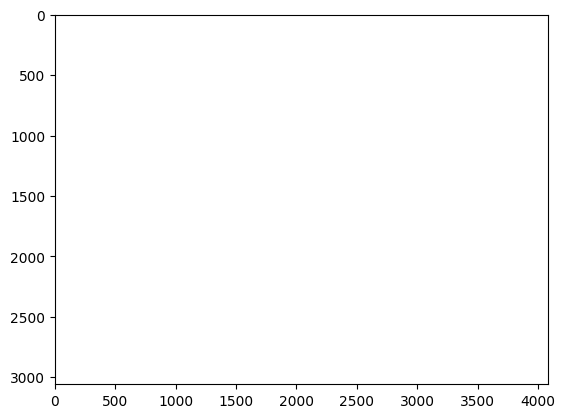

In [13]:
plt.imshow(label)

In [14]:
#Visualizing the masks per class
viz_label = label.astype('int8')

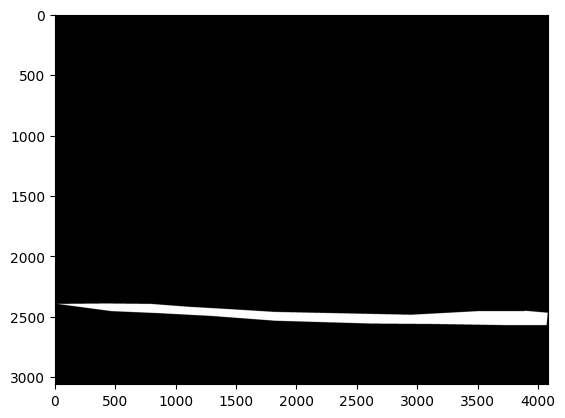

In [15]:
viz_label = np.where(label[:,:,0] >0, 255, 0)
plt.imshow(viz_label,cmap='gray')

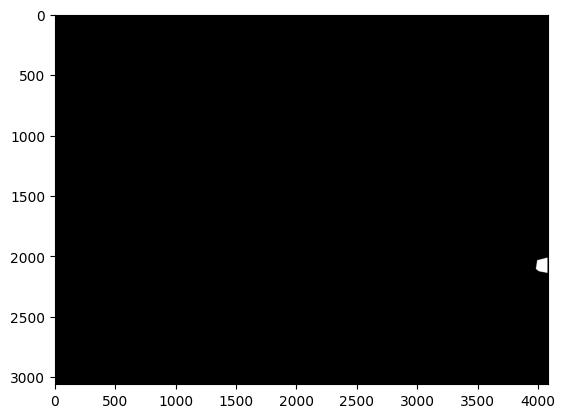

In [16]:
viz_label = np.where(label[:,:,1] > 0 ,255, 1)
plt.imshow(viz_label,cmap='gray')

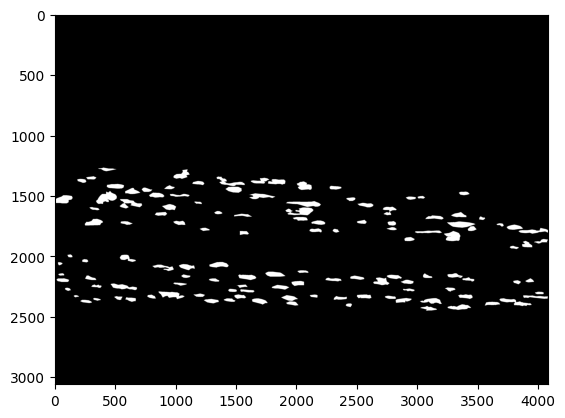

In [17]:
viz_label = np.where(label[:,:,2] > 0 ,255, 2)
plt.imshow(viz_label,cmap='gray')

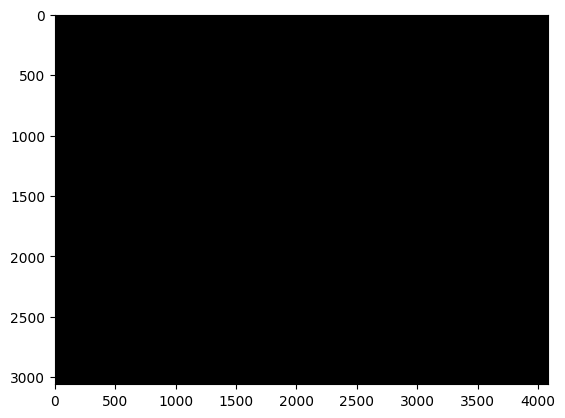

In [18]:
viz_label = np.where(label[:,:,3] > 0 ,255, 3)
plt.imshow(viz_label,cmap='gray')